# Assignment 2 - Question 3
The objective of this assignment is to get you familiarize with  the  problem  of  `Dimensionality Reduction`.

## Instructions
- Write your code and analysis in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of other cells.
- No inbuilt functions to be used until specified. Libraries allowed (Numpy, matplotlib)

## Datasets 
- The IIIT-CFW is database for the cartoon faces in the wild. The dataset contains 8928 annotated cartoon faces of famous personalities of the world with varying profession. Additional 1000 real faces of the public figure to study cross modal retrieval tasks, such as, Photo2Cartoon retrieval. Ref - https://cvit.iiit.ac.in/research/projects/cvit-projects/cartoonfaces
- We have sub sampled the following data for this assignment - Cartoon faces of 8 subjects and approx. 100 images for each subject. 

## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>_Assignment2_Q3.ipynb`.

In [ ]:
# Installing Pillow Libraries
!pip install scikit-learn matplotlib Pillow

In [ ]:
import numpy as np
import os
from random import randrange
from matplotlib import pyplot as plt
from PIL import Image

## Load Data

In [ ]:
cfw_dict = {
    'Amitabhbachan': 0,
    'AamirKhan': 1,
    'DwayneJohnson': 2,
    'AishwaryaRai': 3,
    'BarackObama': 4,
    'NarendraModi': 5,
    'ManmohanSingh': 6,
    'VladimirPutin': 7
}

opt = {
    'image_size': 32,
    'is_grayscale': False,
    'val_split': 0.75
}

In [ ]:
def load_image(path):
    im = Image.open(path).convert('L' if opt['is_grayscale'] else 'RGB')
    im = im.resize((opt['image_size'],opt['image_size']))
    im = np.array(im)
    im = im/256
    return im

def display_images(imgs,classes,row=1,col=2,w=32,h=32):
    fig=plt.figure(figsize=(8, 8))
    for i in range(1, col*row +1):
        img = imgs[i-1]
        fig.add_subplot(row, col, i)
        
        if opt['is_grayscale']:
            plt.imshow(img , cmap='gray') 
        else:
            plt.imshow(img)
        
        plt.title("Class:{}".format(classes[i-1]))
        plt.axis('off')
    plt.show()

def load_data(dir_path):
    image_list = []
    y_list = []
    label_dict = cfw_dict
    for filename in sorted(os.listdir(dir_path)):
        if filename.endswith(".png"):
            im = load_image(os.path.join(dir_path,filename))
            y = filename.split('_')[0]
            y = label_dict[y] 
            image_list.append(im)
            y_list.append(y)
        else:
            continue
    image_list = np.array(image_list)
    y_list = np.array(y_list)
    print("Dataset shape:",image_list.shape)
    print("Label shape:",y_list.shape)

    return image_list,y_list

In [ ]:
dirpath = './IIIT-CFW/'

In [ ]:
# from google.colab import drive
# drive.mount('/content/gdrive')
# dirpath = 'gdrive/MyDrive/'+dirpath 

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
X,y = load_data(dirpath)

Dataset shape: (672, 32, 32, 3)
Label shape: (672,)


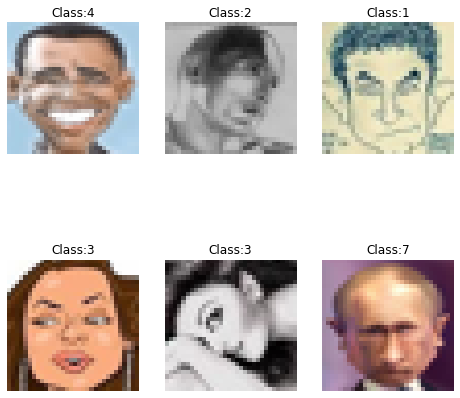

In [ ]:
N,H,W = X.shape[0:3]
C = 1 if opt['is_grayscale'] else X.shape[3]

ind = np.random.randint(0,y.shape[0],6)
display_images(X[ind,...],y[ind], row=2,col=3)

## Dimensionality Reduction
- Plot eigen spectrum for the data.

Percentage of variance preserved is defined as the fraction of eigen values used. As we include more principal components to describe the data, the percentage of variances preserved under the dimensionality reduction increases. 

- Plot the percentage of variances vs the number of principal components to validate the above statement.
- Try visualizing these eigen vectors. Comment on what these ghost faces represent 
- Try reconstructing images with your choice of number of principal components and visualize the reconstructed image.

Let's define reconstruction error as the frobenius norm of the difference between original and reconstructed image. 

- Plot the number of principal components vs the corresponding reconstruction error for 5 selected number of principal components of your choice.
- Using the two dominant principal values, plot the data with colors showing the labels. What do you observe?


#### Write a function that gives eigen values and eigen vectors given data

In [ ]:
from numpy import linalg as LA

def eigen_values(data):
    return LA.eig(data)

In [ ]:
flats = [vec.flatten() for vec in X]

In [ ]:
means = np.mean(flats, axis=0)
flats = flats - means

In [ ]:
covar_matrix = np.cov(flats.T)

#### Compute eigen values and plot eigen value spectrum

In [ ]:
evalue, evector = eigen_values(covar_matrix)

In [ ]:
eigen_pairs = np.array([(np.abs(value), vector) for value, vector in zip(evalue, evector)])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


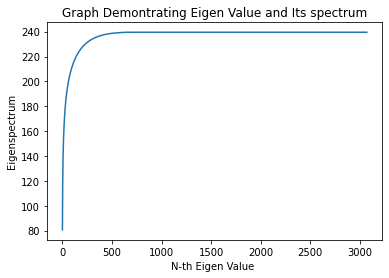

In [ ]:
# plot variance vs components
plt.plot(np.cumsum(evalue.real)
        #  , color='green', marker='D'
         )
plt.ylabel('Eigenspectrum')
plt.xlabel('N-th Eigen Value ')
plt.title('Graph Demontrating Eigen Value and Its spectrum')
plt.show()

In [ ]:
e_dataset=0
tot = sum(evalue)

var_exp = [ (val/tot)*100 for val in evalue]
cum_var = np.cumsum(var_exp)
cnt=0
per=90
for i in cum_var:
  if(i>=per):
    break
  cnt+=1
print("Number of components to get variance % >=",per,"is :",cnt)
e_dataset=cnt

Number of components to get variance % >= 90 is : 114


#### Plot the percentage of variances vs the number of principal components

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


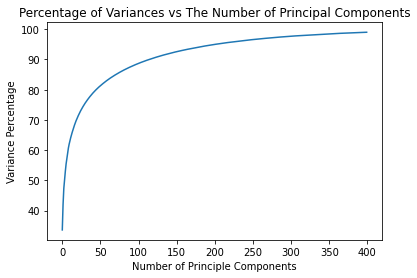

In [ ]:
plt.ylabel('Variance Percentage')
plt.xlabel('Number of Principle Components')
plt.title('Percentage of Variances vs The Number of Principal Components')
plt.plot(cum_var[:400])
plt.show()

#### Visualize eigen faces(eigen vectors)

In [ ]:
import matplotlib.image as mpimg

In [ ]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

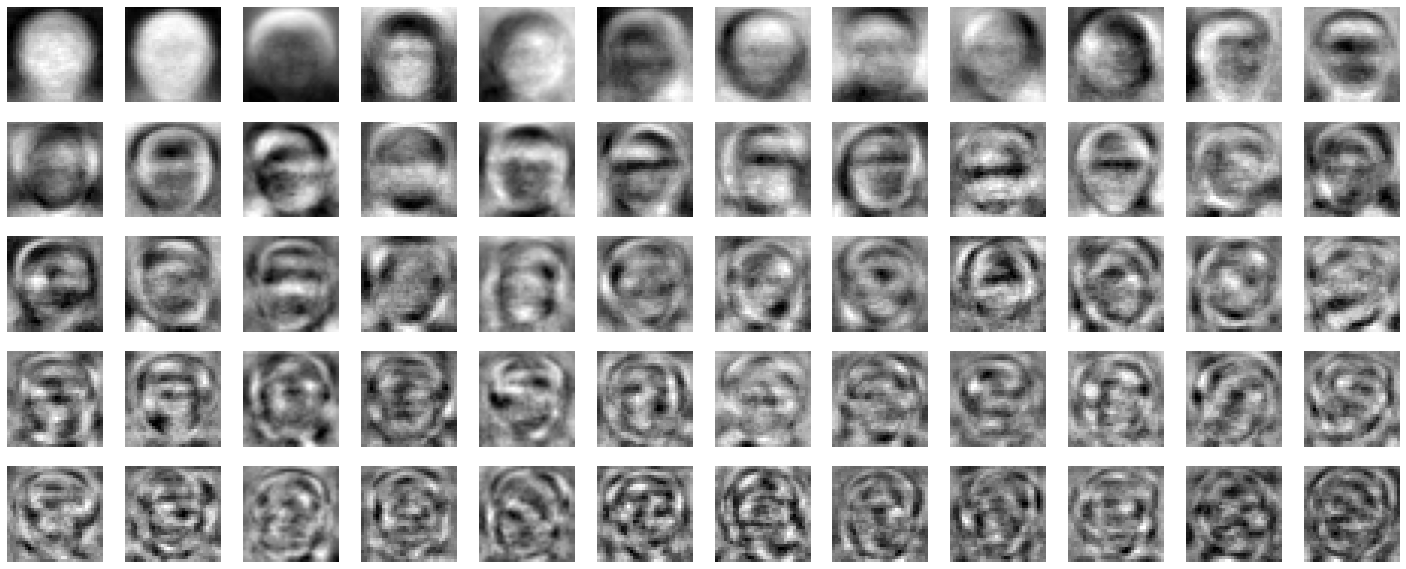

In [ ]:
# No_comp=300
plt.figure(figsize=(25,25))
for i in range(60):
  visual = evector[:,i]
  visual = visual.reshape(32,32,3)
  #print(visual)
  #print(visual[0])
  visual = rgb2gray(visual.real)  
  plt.subplot(12,12,i+1)
  plt.axis('off')
  plt.imshow(visual,cmap=plt.cm.gray)
plt.show()

#### Reconstruction 

In [ ]:
# Use the below sample code to visualize the eigen faces and reconstructed images (can write your own function as well)

def plot(image,H,W,C,indices):
    #indices = [randrange(100)+1 for i in range(5)]
    pl = np.reshape(image,(-1,H,W,C))
    plt.figure(figsize=(25,25))
    for c,i in enumerate(indices):
        ele = pl[i]
        minim = np.min(ele)
        maxim = np.max(ele)
        ele = (ele - minim) / (maxim - minim)
        ele = np.clip(ele,0,254)
        plt.subplot(1,12,c+1)
        plt.axis('off')
        plt.imshow(ele,cmap=plt.cm.gray)
    plt.show()

In [ ]:
#Set the number of components in which 
No_comp = 300

top_k = evector[:,:No_comp]
Y = (flats).dot(top_k)
prop = Y.dot(top_k.T)
prop = prop + means
print(prop.shape)

(672, 3072)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


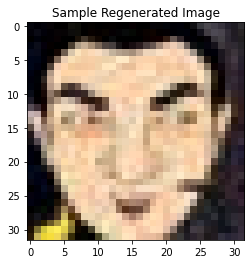

In [ ]:
plt.title('Sample Regenerated Image')
plt.imshow(prop[1].real.reshape(32,32,3))
plt.show()

In [ ]:
indices = [randrange(12)+1 for i in range(5)]

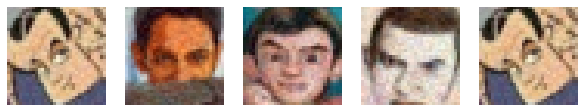

In [ ]:
plot(prop.real,H,W,C, indices)

#### Plot data in 2D

In [ ]:
def fxn(No_comp):
  top_k = evector[:,:No_comp]
  Y = (flats).dot(top_k)
  prop = Y.dot(top_k.T)
  # prop = prop + means
  return prop

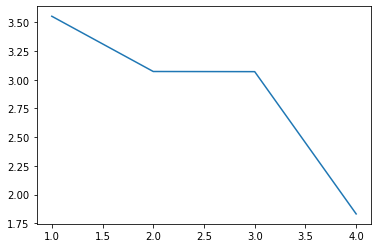

In [ ]:
x=[]
y=[]
for i in range(1,5):
  prop = fxn(i)
  dist = np.linalg.norm(flats[0])-np.linalg.norm(prop[0])
  x.append(i)
  y.append(dist)

plt.plot(x,y)
plt.show()

## Lets analyze the principal components classwise
- Visualize dominant eigen faces of each of the classes.
- Print the number of principal components required to retain 90% variance for each of the classes and for the entire dataset
- Are the number of components same for entire dataset and each of the classes. If yes why? If not why?

Example output:
```
Number of principal components required for 90% reconstruction of the:
Entire Dataset = 10 
Amitabhbachan = 10
AamirKhan = 10
...
```

In [ ]:
# Load data again
X,y = load_data(dirpath)

Dataset shape: (672, 32, 32, 3)
Label shape: (672,)


In [ ]:
flat_x=[]

dict_flat_x={}

for i in range(len(X)):
  if y[i] not in dict_flat_x:
    dict_flat_x[y[i]]=[]

  dict_flat_x[y[i]].append(  np.array(X[i].flatten()))

In [ ]:
dict_cov={}
for i in dict_flat_x:
  dict_cov[i] = np.cov(np.array(dict_flat_x[i]).T)

In [ ]:
dict_eig={}
for i in dict_cov:
  e_val,e_vec=eigen_values(dict_cov[i])
  e_val=e_val.real
  dict_eig[i]=[ e_val, e_vec ]

Number of components to get variance % >= 90 for class  1 is : 23


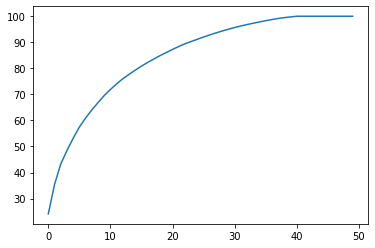

Number of components to get variance % >= 90 for class  3 is : 35


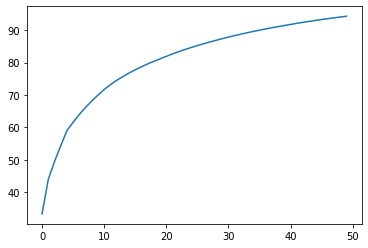

Number of components to get variance % >= 90 for class  0 is : 20


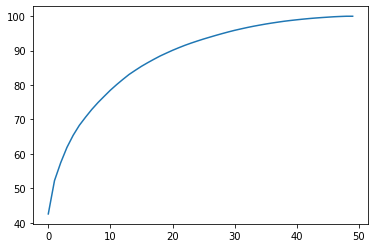

Number of components to get variance % >= 90 for class  4 is : 42


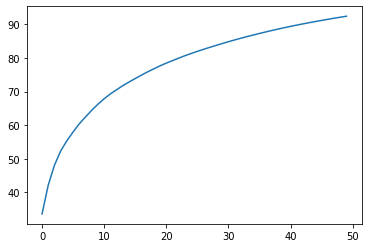

Number of components to get variance % >= 90 for class  2 is : 27


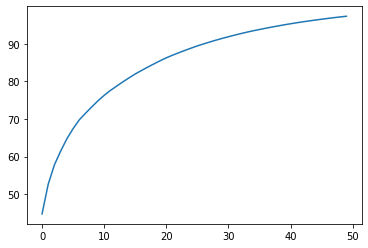

Number of components to get variance % >= 90 for class  6 is : 49


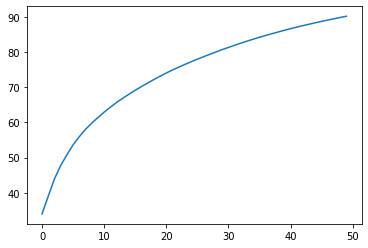

Number of components to get variance % >= 90 for class  5 is : 56


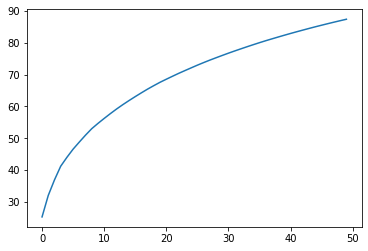

Number of components to get variance % >= 90 for class  7 is : 43


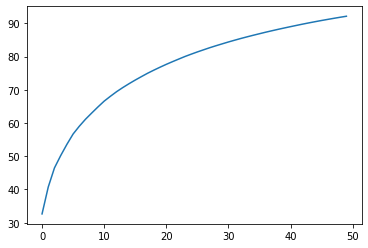

In [ ]:
dict_var={}

for i in dict_eig:
  tot = 0
  for j in dict_eig[i][0]:
    tot+=j

  var_exp = [ (kk/tot)*100 for kk in sorted(dict_eig[i][0],reverse=True)]
  dict_var[i] = var_exp
  cum_var = np.cumsum(var_exp)
  cnt=0
  per=90
  for ii in cum_var:
    if(ii>=per):
      break
    cnt+=1
  print("Number of components to get variance % >=",per,"for class ",i,"is :",cnt)

  plt.plot(cum_var[:50])
  plt.show()


#### Visualize dominant eigen faces of each of the classes

1


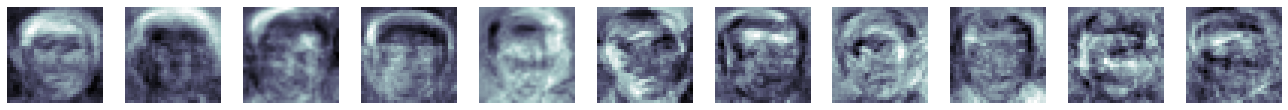

3


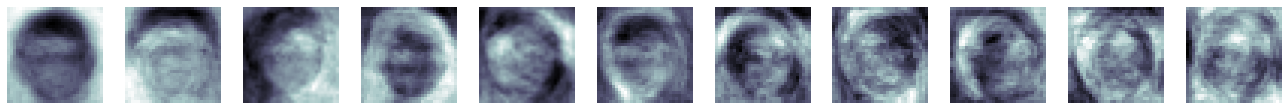

0


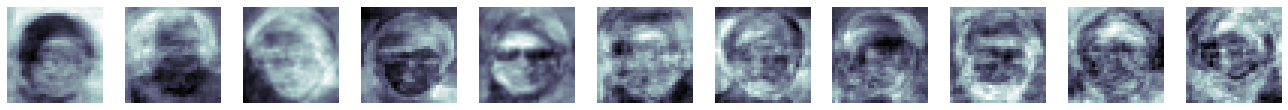

4


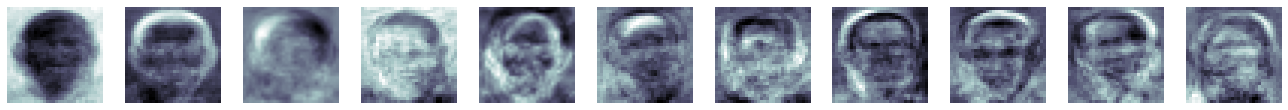

2


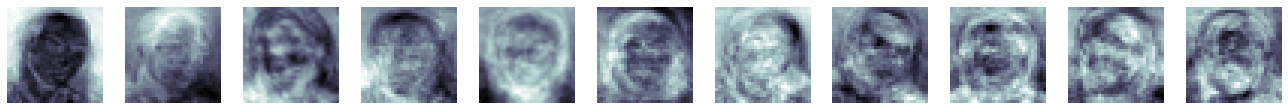

6


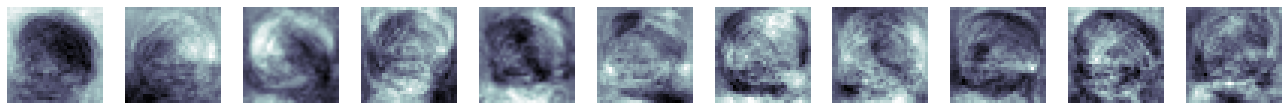

5


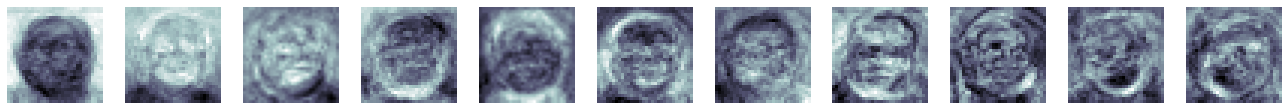

7


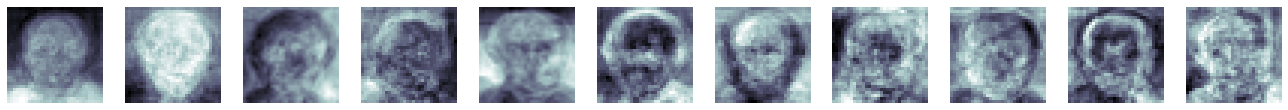

In [ ]:
# # visualize

No_comp=1

for i in dict_eig:
  print(i)
  plt.figure(figsize=(25,25))
  for comp in range(1,12):

    #print(dict_eig[i][1].shape)
    visual = dict_eig[i][1][:,comp]
    #print(visual.shape)
    visual = visual.reshape(32,32,3)
  
    visual = rgb2gray(visual.real)  
    plt.subplot(12,12,comp)
    plt.axis('off')
    plt.imshow(visual,cmap=plt.cm.bone)
  plt.show()

#### Number of principal components required to retain 90% variance for each of the classes and for the entire dataset

In [ ]:
# components required
print("Number of components to get variance % >=",per,"for Entire Dataset is :",e_dataset)
for i in dict_eig:
  tot = 0
  for j in dict_eig[i][0]:
    tot+=j

  var_exp = [ (kk/tot)*100 for kk in sorted(dict_eig[i][0],reverse=True)]
  cum_var = np.cumsum(var_exp)
  cnt=0
  per=90
  for ii in cum_var:
    if(ii>=per):
      break
    cnt+=1
  print("Number of components to get variance % >=",per,"for class ",i,"is :",cnt)
  

Number of components to get variance % >= 90 for Entire Dataset is : 114
Number of components to get variance % >= 90 for class  1 is : 23
Number of components to get variance % >= 90 for class  3 is : 35
Number of components to get variance % >= 90 for class  0 is : 20
Number of components to get variance % >= 90 for class  4 is : 42
Number of components to get variance % >= 90 for class  2 is : 27
Number of components to get variance % >= 90 for class  6 is : 49
Number of components to get variance % >= 90 for class  5 is : 56
Number of components to get variance % >= 90 for class  7 is : 43


#### Analysis : Are the number of components same for entire dataset and each of the classes. If yes why? If not why?

The no. of components are not same for entire dataset and each of the classes, because, 
- in case of each of the class, all images share the main features that define the image, and thus, we require less no. of components
- in case of the entire dataset, the features get more generic as they spread among the different classes, thus, we require no. of components

## Linear Regression (continued)
1. Perform linear regression on below datapoints
2. Use PCA for dimensionality reduction on this datapoints and then perform Linear regression.
3. Perform this experiment on different number of components and report the score for linear regression. Plot the graph of [1-200] principal components vs regression score. What do you observe?

Note :- Can use inbuilt functions for Linear Regression and PCA for this question

In [ ]:
# datapoints
X,y = load_data(dirpath)
X = X.reshape((X.shape[0],-1))
label = np.array([randrange((32*32*3)) for i in range(5)])
label = np.mean(X[:,label], axis = 1)
print(label.shape)

Dataset shape: (672, 32, 32, 3)
Label shape: (672,)
(672,)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA

In [ ]:
def model(component):
    transformed_X = PCA(n_components=component).fit_transform(X)
    reg_model = LinearRegression()
    model_fit = reg_model.fit(transformed_X, label)
    return model_fit.score(transformed_X, label)

In [ ]:
scores = []
for i in range(1, 201):
    scores.append(model(i))

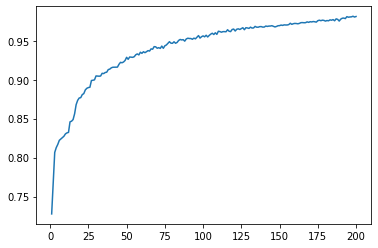

In [ ]:
plt.plot(list(range(1, 201)), scores)
plt.show()

The observation here is that as the no. of components increase the regression score increases. The higher R-squared values represent smaller differences between the observed data and the fitted values.